# FINAL PROJECT

## Heart Failure Prediction

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**HEART DATA VISUALIZATION AND ANALYSIS**

Aim for the project is visualize and analyse heart data visualization and analysis.

**LOAD DATA**

In [2]:
death_df = pd.read_csv('./death.csv')
heart_json_df = pd.read_json(r'https://raw.githubusercontent.com/Mbicha/data_science/main/data/heart2.json')
heart_failuredf = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

**COMBINE DATAFRAMES**

In [3]:
def combine():
    """Return merged data"""
    mg1 = pd.concat([heart_failuredf, heart_json_df], axis=1)
    result_df = pd.concat([mg1,death_df], axis=1)
    return result_df

In [4]:
df3 = combine()
df3.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1


**Duplicates**

Let's remove any duplicates that maight be there in the dataset.

In [5]:
def drop_duplicates(df):
    """
    Parameters
    ==========
    df: Dataframe
        Dataframe to drop duplicates
    
    Return
    =========
    Dataframe without duplicates
    """
    return df.drop_duplicates()

**Add a column**

Time is in days, we can add column called months. For to get mont, we are going to devide days by 30.

month = time/30

In [6]:
def add_month_column(df):
    """Return dataframe with month"""
    df['month'] = (df['time']/30).astype(int)
    return df

In [7]:
df3 = add_month_column(df3)
df3['month'].head()

0    0
1    0
2    0
3    0
4    0
Name: month, dtype: int64

**Missing Values**

All variables here are numeric, for this reason, we are going to use isna()

In [8]:
def check_missing_values(df):
    """
    Parameters
    ==========
    df: Dataframe
        Dataframe from which to check missing values
    
    Return
    =========
    return results of missing values
    """
    return df.isna().sum()

In [9]:
check_missing_values(df3)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
month                       0
dtype: int64

In [10]:
df3.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,month
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0


**Change Column Names**

When we look at the column names, we can see that they are all in lower case. Therefore, it is good to replace DEATH_EVENT to death_event.

In [11]:
df3.rename(columns = {'DEATH_EVENT':'death_event'}, inplace = True)

**AGGEGATIONS**

In [12]:
df3[df3['death_event'] == 1].mean()

age                             65.215281
anaemia                          0.479167
creatinine_phosphokinase       670.197917
diabetes                         0.416667
ejection_fraction               33.468750
high_blood_pressure              0.406250
platelets                   256381.044792
serum_creatinine                 1.835833
serum_sodium                   135.375000
sex                              0.645833
smoking                          0.312500
time                            70.885417
death_event                      1.000000
month                            1.947917
dtype: float64

In [13]:
df3[df3['death_event'] == 0].mean()

age                             58.761906
anaemia                          0.408867
creatinine_phosphokinase       540.054187
diabetes                         0.418719
ejection_fraction               40.266010
high_blood_pressure              0.325123
platelets                   266657.489901
serum_creatinine                 1.184877
serum_sodium                   137.216749
sex                              0.650246
smoking                          0.325123
time                           158.339901
death_event                      0.000000
month                            4.807882
dtype: float64

From above, we can deduce that, the average death rates happen more from the age of 65 years and above.

**DATA VISUALIZATION**

In [14]:
def scatter_plot(df, w, h):
    """
    Parameters
    ==========
    df: Dataframe
        Pandas Dataframe with data to plot
    w: int
        Width of the plots
    h: int
        Height of the plots
    
    Return
    ==========
    Plots of all scattered subplots
    """
    fig, axes = plt.subplots(3, 2, figsize=(w,h))

    sns.scatterplot(data=df, x='age',y='creatinine_phosphokinase', hue='death_event', ax=axes[0,0])
    axes[0,0].set_title('Relationship between Creatinine Phosphokinase and Age', weight='bold')

    sns.scatterplot(data=df, x='age', y='ejection_fraction', hue='death_event', ax=axes[0,1])
    axes[0,1].set_title('Relationship between Ejection Fraction and Age', weight='bold')

    sns.scatterplot(data=df, x='age',y='platelets', hue='death_event', ax=axes[1,0])
    axes[1,0].set_title('Relationship between Platelets and Age', weight='bold')

    sns.scatterplot(data=df, x='age', y='serum_creatinine', hue='death_event', ax=axes[1,1])
    axes[1,1].set_title('Relationship between Serum Creatinine and Age', weight='bold')

    sns.scatterplot(data=df, x='age', y='serum_sodium', hue='death_event', ax=axes[2,0])
    axes[2,0].set_title('Relationship between Serum Sodium and Age', weight='bold')

    sns.scatterplot(data=df, x='age', y='time', hue='death_event', ax=axes[2,1])
    axes[2,1].set_title('Relationship between time and Age', weight='bold')


    plt.tight_layout()
    plt.show()

In [15]:
def count_plot(df, w, h):
    """
    Parameters
    ==========
    df: Dataframe
        Pandas Dataframe with data to plot
    w: int
        Width of the plots
    h: int
        Height of the plots
    
    Return
    ==========
    Plots of all scattered subplots
    """
    fig, axes = plt.subplots(3, 2, figsize=(w,h))

    sns.countplot(data=df, x='anaemia', hue='death_event', ax=axes[0,0])
    axes[0,0].set_title('Count of Anaemia', weight='bold')

    sns.countplot(data=df, x='diabetes', hue='death_event', ax=axes[0,1])
    axes[0,1].set_title('Count of Diabetes', weight='bold')

    sns.countplot(data=df, x='high_blood_pressure', hue='death_event', ax=axes[1,0])
    axes[1,0].set_title('Count of High blood pressure', weight='bold')

    sns.countplot(data=df, x='sex', hue='death_event', ax=axes[1,1])
    axes[1,1].set_title('Count of Sex', weight='bold')

    sns.countplot(data=df, x='smoking', hue='death_event', ax=axes[2,0])
    axes[2,0].set_title('Count of Smoking', weight='bold')

    sns.countplot(data=df, x='month', hue='death_event', ax=axes[2,1])
    axes[2,1].set_title('Count of death per month', weight='bold')

    plt.tight_layout()
    plt.show()


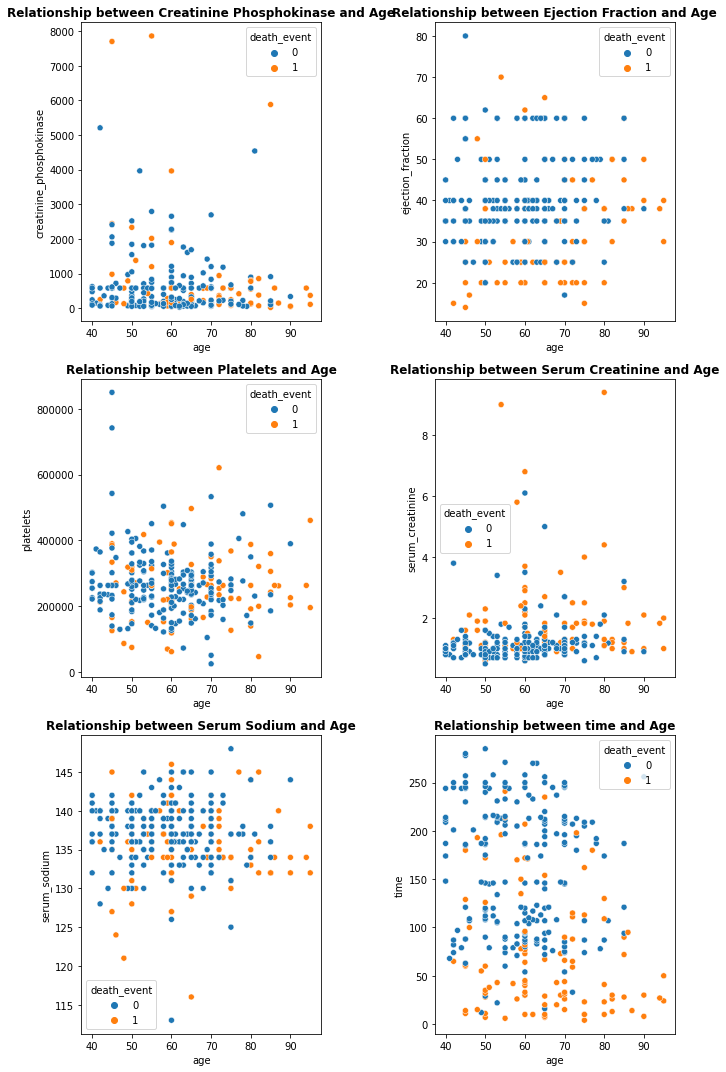

In [16]:
scatter_plot(df3, 10,15)

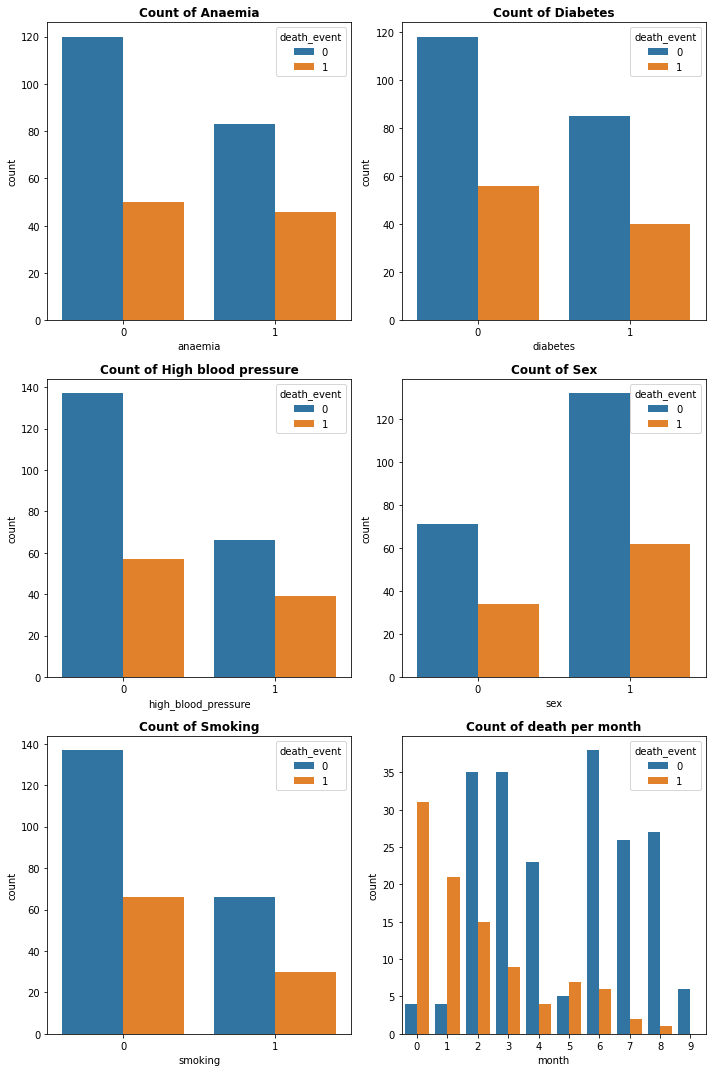

In [17]:
count_plot(df3, 10, 15)

**CONCLUSION**

From above analysis and visalizations, we can conclude that;

1. The patient has no chances of survival during the first 2 months.

2. Deaths start declining from 3rd month onwards.

3. Their seams to have a lot of deaths when the patient is a male.